# Chapter 6: Streams (II): Hierarchies, Recursion, and Flattening

In [1]:
from music21 import*

Review of the chapter 4 **stream(I)**

In [2]:
note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

In [3]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


## Classes and Subclasses

In [5]:
note

<module 'music21.note' from 'D:\\Anaconda\\envs\\music21_doc\\lib\\site-packages\\music21\\note.py'>

In [8]:
print(note.Note)

<class 'music21.note.Note'>


An example of class and subclass (类，子类，创建对象)

In [9]:
class Japan:
    food = "sushi"
    drink = "sake"

class Okinawa(Japan):
    evenBetterFood = "spam potstickers"

In [10]:
o = Okinawa()
print(o.food, o.drink, o.evenBetterFood)

sushi sake spam potstickers


But the joy of spam gyoza has not come to the mainland yet:


The author want to show that *Japan* class has not attribute *evenBetterFood* because it's a additional attribute of subclass *okinawa*.


I think the author is a humorous gay, and you can find many interesting metaphors in everywhere of this Users' Guide documents

In [11]:
j = Japan()
print(j.evenBetterFood)

AttributeError: 'Japan' object has no attribute 'evenBetterFood'

## Accessing Scores, Parts, Measures, and Notes

**Score** => **Part** => **Measure** => **Note**|

**乐谱** => **声部** => **小节** => **音符**

In [12]:
sBach = corpus.parse('bach/bwv57.8')
# parse a score from the corpu

To select specific classes, we can use the ***getElementsByClass()*** method

In [13]:
len(sBach.getElementsByClass(stream.Part))

4

In [14]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [15]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))

3

In [16]:
len(sBach.parts)
# ".parts" is convenienct

4

Notice!!! *getElementsByClass(stream.Measure)* is not a good idea

Instead with the **measures()** method(returning a Stream of Parts or Measures)

or the **measure()** method(returning a single Measure)

In [17]:
alto = sBach.parts[1]  
# parts count from zero, so soprano(女高音) is 0 and alto(女低音) is 1
excerpt = alto.measures(1, 4)
# most pieces (that don’t have pickup measures) begin with measure 1, not zero
excerpt.show('musicxml')

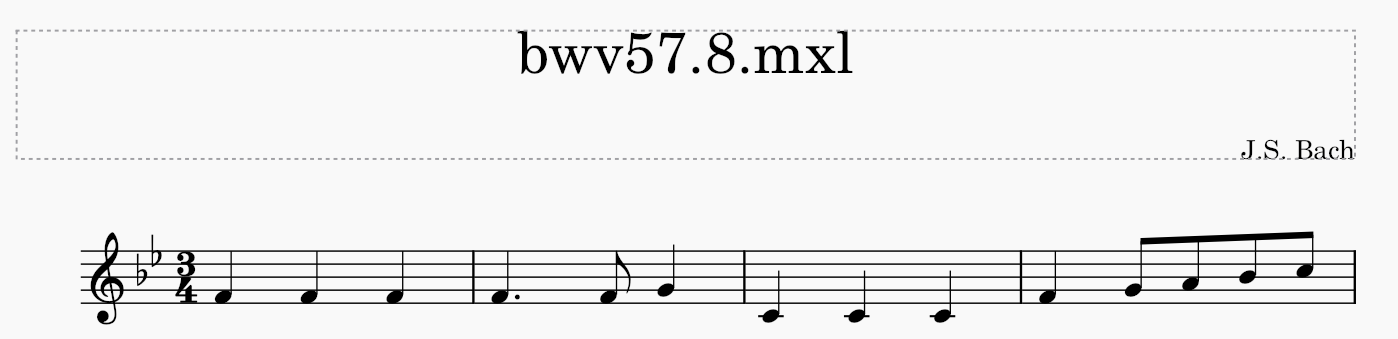

In [18]:
measure2 = alto.measure(2)  # measure not measure_s_
measure2.show('musicxml')

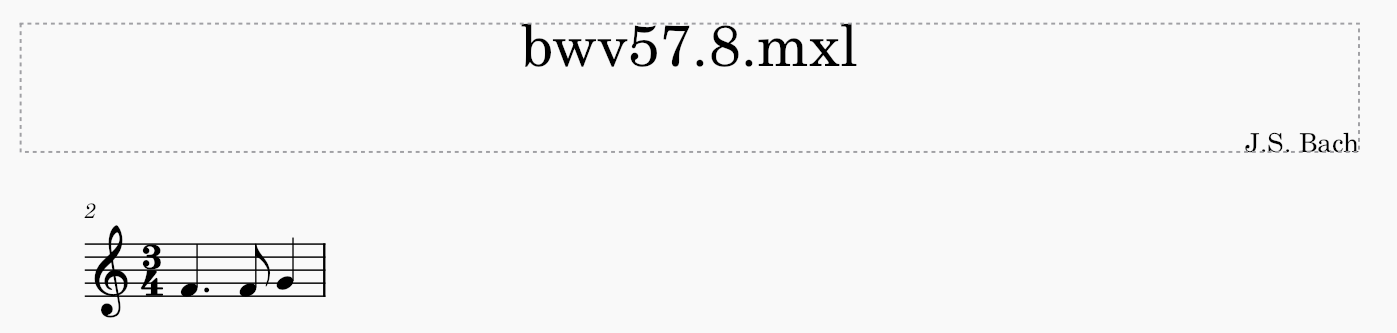

**“measureStack”** ：a collection of measures across all parts of a whole score

In [19]:
measureStack = sBach.measures(2, 3)
measureStack.show('musicxml')

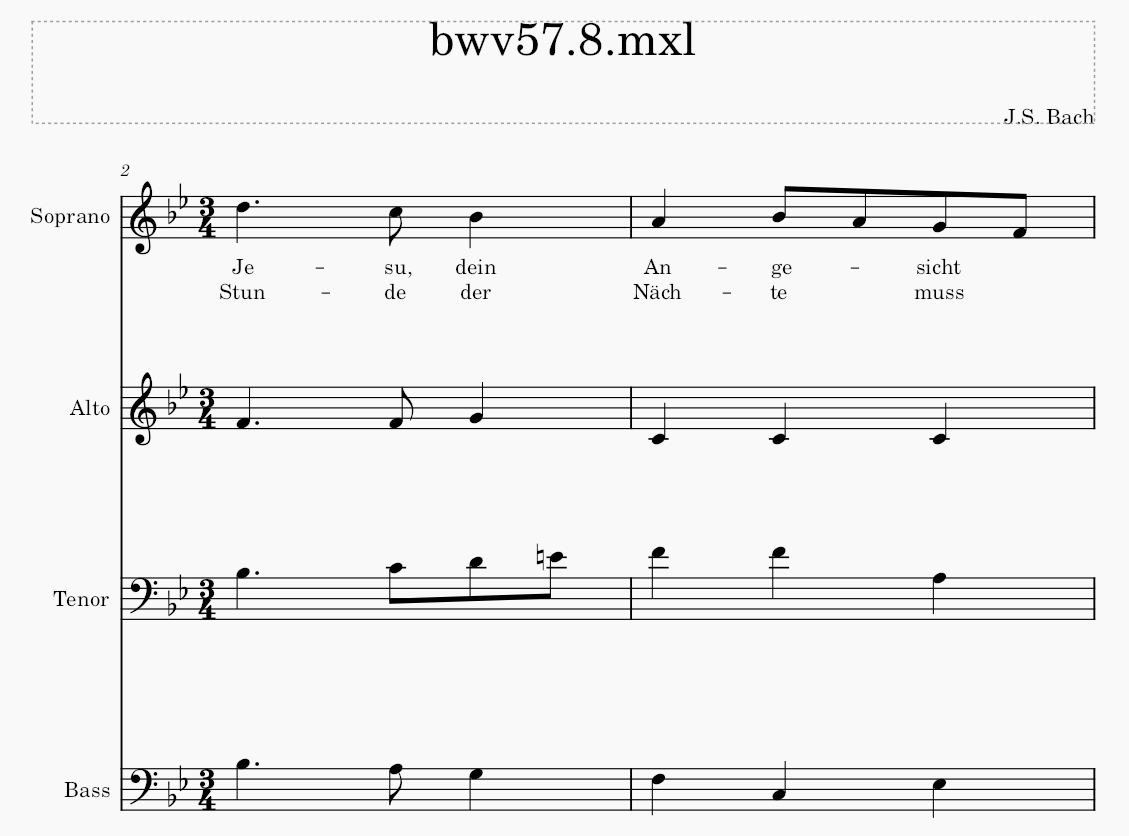

## Recursion in Streams

***recurse()*** will visit every element in the stream

In [20]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


In [21]:
s.show('musicxml')

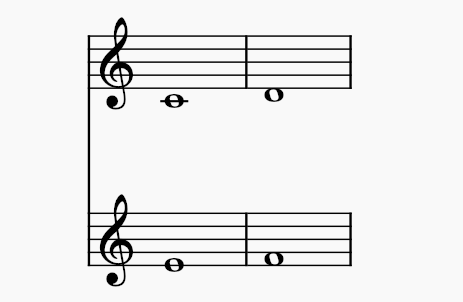

Using **.recurse()** in *for* loop

In [22]:
for el in s.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


One more use for "filtering" *notes*

In [23]:
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


## Flattening a Stream

The ***flatten()*** property provides immediate access to such a flat representation of a Stream

In [24]:
for el in s.flatten():
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


There are no Notes in the sBach stream, they are all inside Measures inside Parts inside the stream

In [25]:
len(sBach.getElementsByClass(note.Note))

0

In [26]:
len(sBach.flatten().getElementsByClass(note.Note))

150

the position of the Measure in the Stream

In [27]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

Notes, have offset values relative **only** to their container, the Measure

In [37]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [38]:
n.getOffsetBySite(m)

1.0

Flattening a structure of nested Streams will set new, **shifted offsets** for each of the elements on the Stream

In [39]:
pFlat = sBach.parts[0].flatten()
indexN = pFlat.index(n)
pFlat[indexN]

<music21.note.Note E->

In [40]:
pFlat[indexN].offset
# the Measure offset of 21 plus the Note offset within this Measure of 1

22.0